In [2]:
import pandas as pd
import csv

In [3]:
df = pd.read_csv('osakahotel.csv',sep = ',',encoding = 'utf-8')

# 1.Among tourists' favourite areas, most of the hotels situate in which area?

According to Booking website, there are four tourists' favourite areas in Osaka: southern area,Namba,Shinsaibashi and Dotonbori. 570 hotels situate in these four areas.I want to know the number of hotels in which area is the largest.

In [4]:
南部地区=df['address'].apply(lambda t:'南部地区' in str(t)).aggregate('sum')
心斋桥=df['address'].apply(lambda t:'心斋桥' in str(t)).aggregate('sum')
道顿堀=df['address'].apply(lambda t:'道顿堀' in str(t)).aggregate('sum')
难波=df['address'].apply(lambda t:'难波' in str(t)).aggregate('sum')

In [6]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sayaka', api_key='gIQREJIrX2NDqdflpwS8')

labels = ['南部地区','难波','心斋桥','道顿堀']
values = [南部地区,难波,心斋桥,道顿堀]
colors = ['#CD5555', '#CD6A6A', '#CD9B9B', '#FFC1C1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               title='In each area there are how many hotels?',
               titlefont=dict(size=40),
               marker=dict(colors=colors, 
                           line=dict(width=1)))

py.iplot([trace], filename='Favourite Location')
#resource:https://plot.ly/python/pie-charts/

From the piechart, we can find that in the southern area of Osaka there are more hotels than in other three areas.

# 2.Why these areas are popular among tourists?

So why these four areas in Osaka are popular among tourists? I extract the information of the 570 hotels' descriptions and try to find what attract tourists.

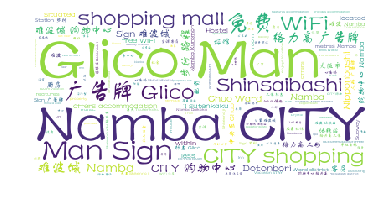

In [8]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

jieba.load_userdict('dict.txt')
stopchars = ' （）·・()_★- 位于 大阪 距离 Osaka 提供 km Set 分钟 Hotel 酒店 公寓 Located Situated Apartment'
words = []
for name in df['description']:
    jieba_words = jieba.cut(name)
    words += [word for word in jieba_words if word not in stopchars]

    
font = r'C:\Windows\Fonts\FZSTK.TTF'

wordcloud = WordCloud(font_path=font,background_color='white').generate(' '.join(words))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

wordcloud.to_file('Osaka.jpg')

From the wordcloud picture above, people can see that in most hotels' descriptions they mention "Namba city","Glico Man Sign" and "Shopping mall". We can guess that these places are very popular among tourists so the hotels add them to the descrition to  attract customers.

In [9]:
import pandas as pd
import numpy as np
import re

df2 = pd.read_csv('osakahotel.csv',sep = ',',encoding = 'utf-8')

In [10]:
def convertToCommentNum(comment):
    if not isinstance(comment, str) and np.isnan(comment):
        return None
    comment_num_str = re.search(r'\d{1,3}(,\d\d\d)*', comment).group()
    comment_num_str = comment_num_str.replace(',', '')
    comment_num = int(comment_num_str)
    
    return comment_num


df2['comments_num'] = df2['comments'].apply(convertToCommentNum)
df2 = df2.drop('comments', axis=1)

df2['address'] = df2['address'].apply(lambda address: re.search(r'【(.*)】', address).group(1))

# 3.The hotels in which area are the most popular among tourists?

I extract the comments' number and scores of the 570 hotels to see the hotels in which area are the most popluar and with high score.

In [11]:
from pyecharts import Bar
pd_df3 = df2.groupby(['address'])['comments_num'].sum().reset_index().sort_values("comments_num",ascending=False)
pd_df2 = df2.groupby(['address'])['score'].mean().reset_index().sort_values("score",ascending=False)

attr = pd_df2.address
v1 = pd_df2.score
v2 = pd_df3.comments_num
bar = Bar("Area by score and comments")
bar.add("by score", attr, v1, mark_line=["average"])
bar.add("by comments_num", attr, v2, mark_line=["average"])
bar.render('osakahotel.html')
from IPython.display import IFrame
IFrame('osakahotel.html', width=800, height=400)
bar

The barchart above shows the total number of comments and the mean values of the hotels in the four areas. Alough there are more hotels in the sounthern area of Osaka than other three areas, we can find that the hotels in the southern area receive less comments and get lower score.This barchart gives people suggestion when people choose hotel. We can see that the hotels near Shinsaibashi are the most popular and get the highest score. 